<a href="https://colab.research.google.com/github/nptikiran/Python-program/blob/main/NLP_tensorFlow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Natural Langauge Processing

Sequencing :- Turning Sentences into data

In [1]:
#Import Libraries
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
sentences = [
             'I love my Dog',
             'I love my Cat',
             'You love my Dog',
             'Do you think my dog is amazing'
]

In [3]:
tokenizer = Tokenizer(num_words = 100, oov_token='<oov>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index


In [4]:
sequences = tokenizer.texts_to_sequences(sentences)
sequences

[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

In [5]:
padded = pad_sequences(sequences,maxlen=5)

In [6]:
print('\nword_index = ',word_index)
print('\nSequences = ',sequences)
print('\nPadded Sequences :')
print(padded)


word_index =  {'<oov>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

Padded Sequences :
[[ 0  5  3  2  4]
 [ 0  5  3  2  7]
 [ 0  6  3  2  4]
 [ 9  2  4 10 11]]


In [7]:
# Test new data
test_data = [
             'i really love my dog',
             'my dog loves may manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequences = ",test_seq)

padded = pad_sequences(test_seq,maxlen=10)
print('\nPadded Test Sequance:')
print(padded)


Test Sequences =  [[5, 1, 3, 2, 4], [2, 4, 1, 1, 1]]

Padded Test Sequance:
[[0 0 0 0 0 5 1 3 2 4]
 [0 0 0 0 0 2 4 1 1 1]]


#**Training Model to recognize sentiment in text**

In [31]:
# Run this to ensure TensorFlow 2.x is used
try:
  #%tensorflow_version 2.x
  %tensorflow_version 2.x
except Exception:
  pass

In [32]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [33]:
vacab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<oov>'
training_size = 20000

In [34]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-04-21 13:54:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 142.250.107.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2021-04-21 13:54:12 (149 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [35]:
with open('/tmp/sarcasm.json','r') as f:
  datastore = json.load(f)


sentences = []
labels = []
urls = []

for items in datastore:
  sentences.append(items['headline'])
  labels.append(items['is_sarcastic'])
  urls.append(items['article_link'])

In [12]:
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [13]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences,padding='post')
print(padded.shape)
print(padded[0])
print(sequences[0])

(26709, 40)
[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
[308, 15115, 679, 3337, 2298, 48, 382, 2576, 15116, 6, 2577, 8434]


In [37]:
# With Train test splits
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [38]:
# Create saperate tokeniser for training data
tokenizer = Tokenizer(num_words=vacab_size, oov_token=oov_tok)

#Create token for every word in the corpous/data which can seen in word_index
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

## Create sequences(creating array with token no. arrange in sequence) and pad(adding zeroes) them for same length only for trainig data
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [39]:
print(training_padded.shape)
print(training_padded[0])

(20000, 100)
[ 328    1  799 3405 2404   47  389 2214    1    6 2614 8863    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [40]:
# convert data into array
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [41]:
model = tf.keras.Sequential([
                             # Embedding= learn direction of each word whether it is +ve or -ve
                             tf.keras.layers.Embedding(vacab_size,embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),# added the vectors in embedding
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')

])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [43]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/30
625/625 [==============================] - 3s 5ms/step - loss: 0.6838 - accuracy: 0.5626 - val_loss: 0.6034 - val_accuracy: 0.7248
Epoch 2/30
625/625 [==============================] - 3s 4ms/step - loss: 0.5138 - accuracy: 0.8058 - val_loss: 0.3924 - val_accuracy: 0.8325
Epoch 3/30
625/625 [==============================] - 3s 4ms/step - loss: 0.3338 - accuracy: 0.8683 - val_loss: 0.3553 - val_accuracy: 0.8501
Epoch 4/30
625/625 [==============================] - 3s 4ms/step - loss: 0.2701 - accuracy: 0.8980 - val_loss: 0.3423 - val_accuracy: 0.8557
Epoch 5/30
625/625 [==============================] - 3s 4ms/step - loss: 0.2306 - accuracy: 0.9158 - val_loss: 0.3414 - val_accuracy: 0.8585
Epoch 6/30
625/625 [==============================] - 3s 4ms/step - loss: 0.2024 - accuracy: 0.9223 - val_loss: 0.3469 - val_accuracy: 0.8587
Epoch 7/30
625/625 [==============================] - 3s 4ms/step - loss: 0.1798 - accuracy: 0.9344 - val_loss: 0.3601 - val_accuracy: 0.8556
Epoch 

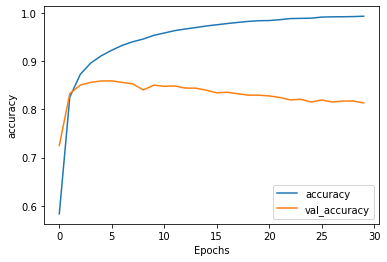

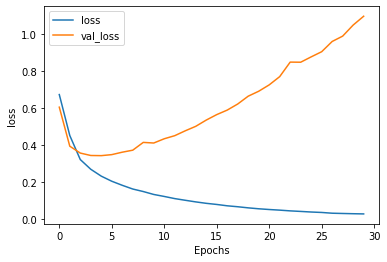

In [58]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
   
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [60]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
  return ' '.join([reverse_word_index.get(i,'?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])


former <oov> store clerk sues over secret 'black <oov> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [61]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape:(vacab_size, embedding_dim)

(10000, 16)


In [62]:
import io

out_v =io.open('vecs.tsv','w',encoding='utf-8')
out_m = io.open('meta.tsv','w',encoding='utf_8')
for word_num in range(1, vacab_size):
  word = reverse_word_index[word_num]
  embedding = weights[word_num]
  out_m.write(word +'\n')
  out_v.write('\t'.join([str(x) for x in embedding]) + "\n")
out_v.close()
out_m.close()

In [63]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
sentences = ['granny starting to fear spiders in garden might be real',
             'game of thrones finale showing this sunday night']
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

In [66]:
print(model.predict(padded))

[[9.983580e-01]
 [7.299032e-07]]


#**Long Short Term Memory**

In [75]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vacab_size, 64),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  #LSTM takes numeric parameter for the number of hidden nodes
  #bidirectional check the sentence forward and backword to check best parameter for each.
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 751,489
Trainable params: 751,489
Non-trainable params: 0
_________________________________________________________________
